# Алгоритмы анализа данных

### Домашнее задание №1 к Урок 1. Алгоритм линейной регрессии. Градиентный спуск.

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14,
                     'xtick.labelsize': 14})

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],   # для умножения на intercept
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]]).T # стаж репетитора
X

array([[ 1,  1],
       [ 1,  1],
       [ 1,  2],
       [ 1,  1],
       [ 1,  3],
       [ 1,  0],
       [ 1,  5],
       [ 1, 10],
       [ 1,  1],
       [ 1,  2]])

1. Проведите небольшое исследование алгоритма градиентного спуска на данных из урока. Оцените влияние значений скорости обучения (`alpha`) и количества итераций на ошибку алгоритма. Как связаны эти два гиперпараметра между собой? Подберите скорость обучения и количество итераций до совпадения ответов алгоритма с результатами МНК. Как можно ускорить процесс вычисления весов?

In [3]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [4]:
# средний балл ЕГЭ (целевая переменная)
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

In [5]:
# организация процедуры для экспериментов
def params(alpha,iterations,w,n,X, diff = None):
    iterat = []
    errs = []
    flag_break = 0
    for i in range(1, int(iterations + 1)):       
        y_pred = np.dot(w, X.T)
        err = calc_mse(y, y_pred)        
        
        for j in range(w.shape[0]):
            w[j] -= alpha * (1/n * 2 * np.sum(X[:,j] * (y_pred - y)))            
            iterat.append(i)
            errs.append(err)
            if diff != None and (err - 45.937499999999986) <= diff:                    
                flag_break = 1
                break
        if flag_break == 1:
            break
            
    print(f'MSE при alpha = {alpha}, iterations = {i} w = {w}, err = {err}') # МНК: array([47.23214286,  3.91071429]) 45.937499999999986
    print(f'МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => расхождение = {min(errs)-45.937499999999986}')
    return iterat, errs

MSE при alpha = 0.0001, iterations = 10000 w = [31.64269117  6.78942579], err = 176.62240977239327
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => расхождение = 130.68490977239327
время выполнения 0.918968 s


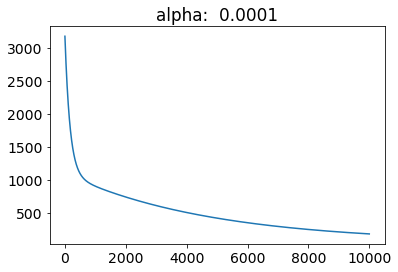

MSE при alpha = 0.00025, iterations = 10000 w = [46.07401354  4.12457172], err = 46.6589618408401
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => расхождение = 0.7214618408401137
время выполнения 0.907041 s


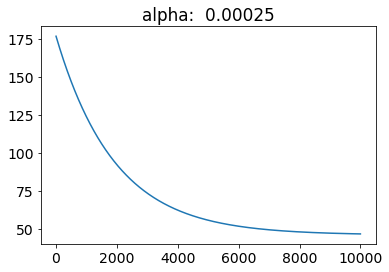

MSE при alpha = 0.0005, iterations = 10000 w = [47.22575558  3.91189375], err = 45.937521956184455
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => расхождение = 2.195618446876324e-05
время выполнения 0.870031 s


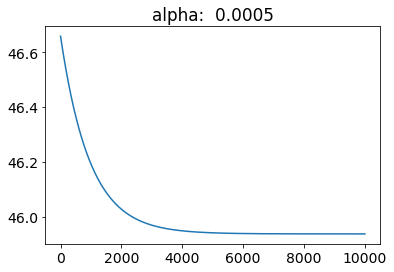

MSE при alpha = 0.00075, iterations = 10000 w = [47.23214024  3.91071477], err = 45.937500000003666
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => расхождение = 3.680611371237319e-12
время выполнения 0.873034 s


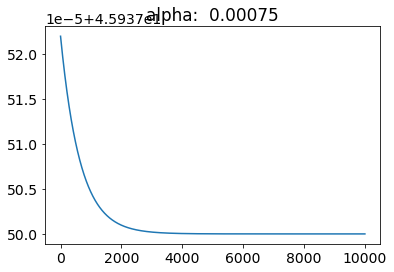

MSE при alpha = 0.0085, iterations = 10000 w = [47.23214286  3.91071429], err = 45.937499999999986
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => расхождение = -1.4210854715202004e-14
время выполнения 0.861042 s


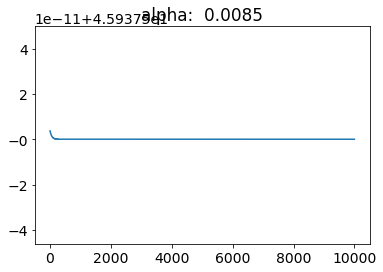

MSE при alpha = 0.001, iterations = 10000 w = [47.23214286  3.91071429], err = 45.937499999999986
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => расхождение = 0.0
время выполнения 0.860041 s


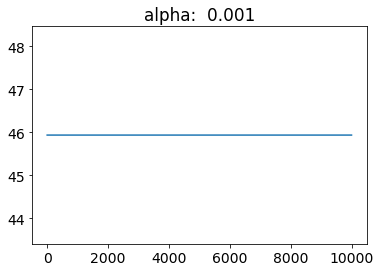

In [6]:
# проводим эксперимент изменяя только eta (alpha)
n = X.shape[0]
alpha = 1e-2
iterations = 1e4
w = np.array([1, 0.5])

for alpha in [0.0001, 0.00025, 0.0005, 0.00075, 0.0085, 0.001]:
    start_time =time.time()
    iterat, errs = params(alpha, 1e4, w, n, X)
    print ("время выполнения {:g} s".format(time.time() - start_time))
    plt.title(f"alpha:  {alpha}")
    plt.plot(iterat, errs)    
    plt.show()

Вывод: с увеличением ETA увеличивается скорость поиска минимума, но уменьшается точность. можем неточно найти / пропустить минимум

MSE при alpha = 0.0001, iterations = 10000 w = [31.64269117  6.78942579], err = 176.62240977239327
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => расхождение = 130.68490977239327
0.866042 s


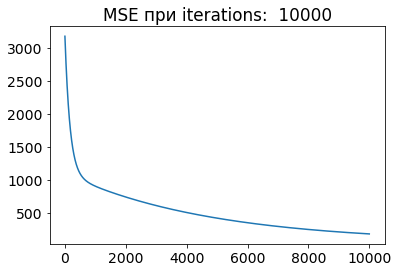

MSE при alpha = 0.0001, iterations = 10000 w = [41.72106496  4.92837698], err = 62.26940558271126
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => расхождение = 16.331905582711272
0.862016 s


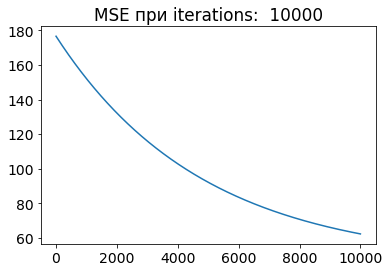

MSE при alpha = 0.0001, iterations = 15000 w = [46.07377869  4.12461509], err = 46.65902932675045
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => расхождение = 0.7215293267504634
1.29402 s


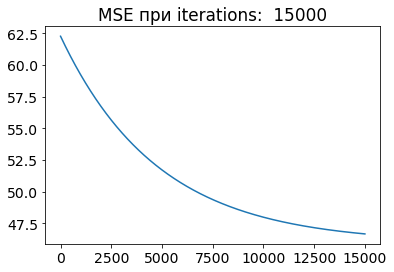

MSE при alpha = 0.0001, iterations = 20000 w = [47.0873802   3.93744582], err = 45.948768778025496
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => расхождение = 0.011268778025510073
1.73801 s


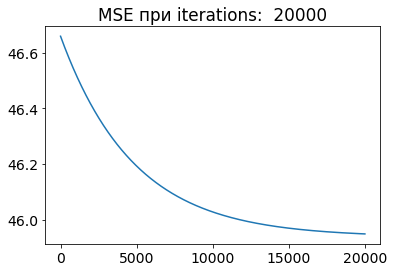

MSE при alpha = 0.0001, iterations = 30000 w = [47.22574737  3.91189526], err = 45.93752199434731
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => расхождение = 2.1994347321196983e-05
2.60204 s


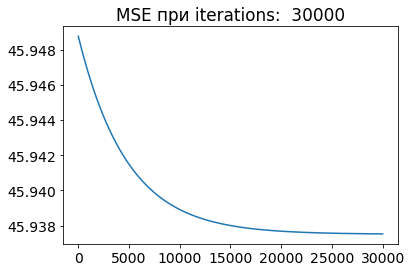

MSE при alpha = 0.0001, iterations = 40000 w = [47.23204297  3.91073273], err = 45.93750000536484
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => расхождение = 5.36485345037363e-09
3.54604 s


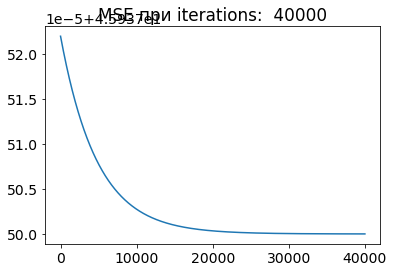

In [7]:
# проводим эксперимент изменяя только iterations
n = X.shape[0]
alpha = 1e-2
iterations = 1e4
w = np.array([1, 0.5])
j=0


for iterations in [10000, 10000, 15000, 20000, 30000, 40000]:
    start_time =time.time()
    iterat, errs = params(0.0001, iterations, w, n, X) 
    print ("{:g} s".format(time.time() - start_time))
    plt.plot(iterat, errs)    
    plt.title(f"MSE при iterations:  {iterations}")

    plt.show()


Вывод: с увеличением iterations увеличивается время поиска минимума, но увеличивает точность. необходимо правильно выбрать ETA. 

MSE при alpha = 0.0008333333333333334, iterations = 5000 w = [46.65396102  4.01747998], err = 46.117534308414676
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => расхождение = 0.18003430841469026
Время выполнения 0.451997 s


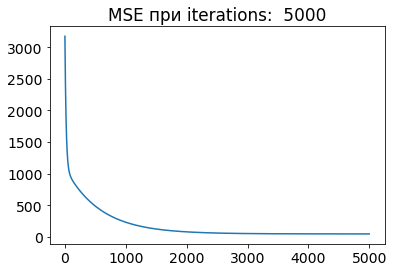

MSE при alpha = 0.00045454545454545455, iterations = 10000 w = [47.22702622  3.91165911], err = 45.93751408812911
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => расхождение = 1.408812912728763e-05
Время выполнения 0.860042 s


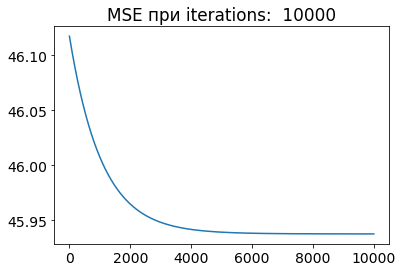

MSE при alpha = 0.0003125, iterations = 15000 w = [47.23210378  3.9107215 ], err = 45.93750000082143
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => расхождение = 8.214442459575366e-10
Время выполнения 1.299 s


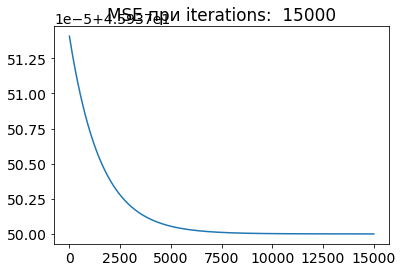

MSE при alpha = 0.0002380952380952381, iterations = 20000 w = [47.23214258  3.91071434], err = 45.93750000000004
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => расхождение = 2.842170943040401e-14
Время выполнения 1.77804 s


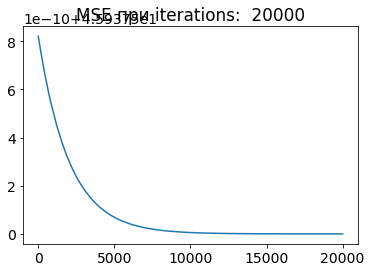

MSE при alpha = 0.00016129032258064516, iterations = 30000 w = [47.23214286  3.91071429], err = 45.937499999999986
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => расхождение = -2.1316282072803006e-14
Время выполнения 2.61604 s


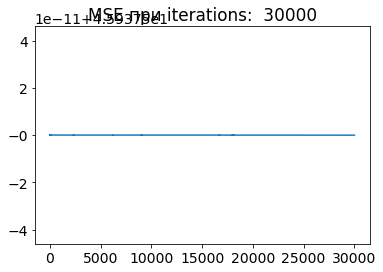

MSE при alpha = 0.00012195121951219512, iterations = 40000 w = [47.23214286  3.91071429], err = 45.9375
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => расхождение = -2.1316282072803006e-14
Время выполнения 3.47503 s


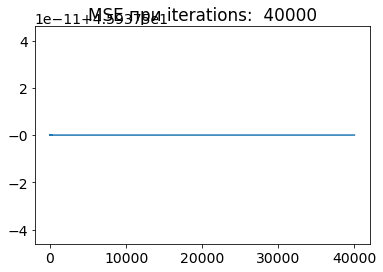

In [8]:
# проведем эксперимент изменяя сразу два параметра iterations и ETA. 
# причем ETA будем выбирать в зависимости от iterations и некоторых начальных констант
n = X.shape[0]
alpha = 1e-2
iterations = 1e4
w = np.array([1, 0.5])
t0, t1 = 5, 1000

for iterations in [5000, 10000, 15000, 20000, 30000, 40000]:
    start_time =time.time()
    iterat, errs = params(t0 / (iterations + t1), iterations, w, n, X) 
    print ("Время выполнения {:g} s".format(time.time() - start_time))    
    plt.plot(iterat, errs)    
    plt.title(f"MSE при iterations:  {iterations}")

    plt.show()

Вывод: выбирая сразу 2 параметра важно не перепрыгнуть точку минимума, при верном выборе - учвеличивается скорость поиска минимума.

*2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

MSE при alpha = 0.001, iterations = 0 w = [1.1102 0.84  ], err = 3173.15
MSE при alpha = 0.001, iterations = 100 w = [ 7.43515582 10.71754582], err = 899.5990444359252
MSE при alpha = 0.001, iterations = 200 w = [11.44993589 10.49282195], err = 735.5540619653672
MSE при alpha = 0.001, iterations = 300 w = [14.98921624  9.8634316 ], err = 606.0048772266812
MSE при alpha = 0.001, iterations = 400 w = [18.17511588  9.27626113], err = 500.7989288428639
MSE при alpha = 0.001, iterations = 500 w = [21.04606457  8.74617136], err = 415.355423398327
MSE при alpha = 0.001, iterations = 600 w = [23.63334499  8.26841272], err = 345.9620646005472
MSE при alpha = 0.001, iterations = 700 w = [25.96499229  7.83785632], err = 289.6039104863001
MSE при alpha = 0.001, iterations = 800 w = [28.06626432  7.44984037], err = 243.83236130353217
MSE при alpha = 0.001, iterations = 900 w = [29.95992301  7.10016181], err = 206.65877484533297
MSE при alpha = 0.001, iterations = 1000 w = [31.66648131  6.78503276],

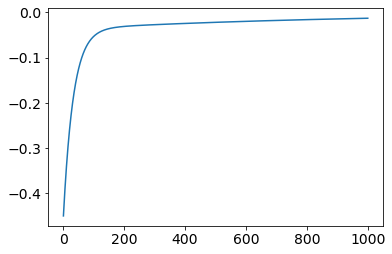

In [9]:
w = np.array([1, 0.5])
alpha = 0.001

f=[]
for i in range(1001):
    y_pred = np.dot(w, X.T)
    err = calc_mse(y, y_pred)
    #w -= (alpha * (1/n * 2 * np.sum(X.T * (y_pred - y)))) # ошибка!
    f.append(alpha * (1/n * 2 * np.sum(X.T * (y_pred - y))))
    w[0] -= alpha * (1/n * 2 * np.sum(X[:,0].T * (y_pred - y))) # ошибка!
    w[1] -= alpha * (1/n * 2 * np.sum(X[:,1].T * (y_pred - y))) # ошибка!    
    if i % 100 == 0:
        print(f'MSE при alpha = {alpha}, iterations = {i} w = {w}, err = {err}') 
        # [47.23214286  3.91071429] 45.937499999999986        
plt.plot(f)

*3. Вместо того, чтобы задавать количество итераций, задайте условие остановки алгоритма - когда ошибка за итерацию начинает изменяться ниже определенного порога. 

Сколько нужно сделать итераций, если установить допустимое отклонение mse в размере $\text{diff}=10^{-6}$, а значение $\alpha=10^{-2}$?

In [10]:
w = np.array([1, 0.5])
diff = 1e-6
alpha = 1e-2
iterat, errs = params(1e-2, 40000, w, n, X, 1e-6) 


MSE при alpha = 0.01, iterations = 995 w = [47.23080079  3.91096471], err = 45.93750098877656
МНК: array([47.23214286,  3.91071429]) 45.937499999999986 => расхождение = 9.8877657705998e-07
